In [11]:
import pandas as pd
import numpy as np

In [12]:
# La feature 205 è il label/target
fake_news_df = pd.read_csv("https://raw.githubusercontent.com/c0pper/fakenews_detector/main/File%20Vincenzo/FN20K.csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"],sep=";")
validation_df = pd.read_csv("https://raw.githubusercontent.com/c0pper/fakenews_detector/main/File%20Vincenzo/ValidationTest%20(1).csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"],sep=",")

In [13]:
y = fake_news_df["205"].values
X = fake_news_df.drop(["205"], axis=1).values
y_val = validation_df["205"].values
X_val = validation_df.drop(["205"], axis=1).values

In [14]:
y = np.array(y)
X = np.array(X)
y_val = np.array(y_val)
X_val = np.array(X_val)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train) #perchè qui fit_transform e sotto no? Cosa si intende per *fit* to data https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler.fit_transform
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

X_train.shape

(16449, 204)

# Simple tf.keras Sequential Model
https://youtu.be/qFJeN9V1ZsI?t=1175

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU

In [18]:
# physical_devices = tf.config.experimental.list_physical_devices("GPU")
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [19]:
model = Sequential()
#model.add(Dense(100, input_dim=X_train.shape[1]))
model.add(Dense(100, input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=0.007, l2=0.005)))
model.add(LeakyReLU(alpha=0.001))
#model.add(Dropout(0.3)) 
model.add(Dense(60,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dense(60,  activation="tanh",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.3)) 
model.add(Dense(30,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(15,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(7,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dense(3, activation="softmax"))
#model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               20500     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0

https://youtu.be/qFJeN9V1ZsI?t=1518

In [20]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import History
history = History()
from time import time
start_at = time ()

In [22]:
model.fit(x=X_train, y=y_train, epochs=100, batch_size=512, callbacks=[history])
execution_time = time()-start_at

Epoch 1/100
33/33 [==============================] - 2s 5ms/step - loss: 10.4801 - accuracy: 0.6074
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 6.1969 - accuracy: 0.7730
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 3.2285 - accuracy: 0.8373
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 1.5096 - accuracy: 0.8541
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.8756 - accuracy: 0.8557
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.7003 - accuracy: 0.8627
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.8672
Epoch 8/100
33/33 [==============================] - 0s 4ms/step - loss: 0.5617 - accuracy: 0.8708
Epoch 9/100
33/33 [==============================] - 0s 5ms/step - loss: 0.5261 - accuracy: 0.8764
Epoch 10/100
33/33 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.8779
Epoch 11

33/33 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.9056
Epoch 84/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.9030
Epoch 85/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.9010
Epoch 86/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.9021
Epoch 87/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.9046
Epoch 88/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.9010
Epoch 89/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.9001
Epoch 90/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.9031
Epoch 91/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.9072
Epoch 92/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.9034
Epoch 93/100


In [49]:
model.evaluate(X_test, y_test)

91/91 [==============================] - 0s 1ms/step - loss: 0.3672 - accuracy: 0.9063


[0.3672240972518921, 0.9063038229942322]

https://youtu.be/qFJeN9V1ZsI?t=2390

# Predict

In [50]:
predictions = model.predict(x=X_test, batch_size=512, verbose=0) #same batch as when training

In [24]:
print("Real\tFake")
for i in predictions:
    print(i)

Real	Fake
[0.9859714  0.01402863]
[0.97233003 0.02767004]
[0.98867756 0.0113224 ]
[0.9678067  0.03219331]
[0.81362367 0.18637636]
[0.7208338  0.27916625]
[0.09747738 0.90252256]
[0.149402   0.85059804]
[0.00664456 0.9933555 ]
[0.72345424 0.2765458 ]
[0.04243695 0.9575631 ]
[0.04350717 0.9564929 ]
[0.67165023 0.3283498 ]
[0.62233716 0.37766284]
[0.02846192 0.9715381 ]
[0.98867756 0.01132241]
[0.9880482 0.0119518]
[0.04158297 0.958417  ]
[0.09425484 0.9057452 ]
[0.2489708  0.75102913]
[0.20961697 0.790383  ]
[0.02724823 0.9727518 ]
[0.03737539 0.96262455]
[0.0228439  0.97715616]
[0.9880371  0.01196283]
[0.98867756 0.01132241]
[0.7516479  0.24835205]
[0.9860428  0.01395725]
[0.16994683 0.8300532 ]
[0.8211103  0.17888974]
[0.9822091  0.01779089]
[0.02155063 0.9784494 ]
[0.17587882 0.8241211 ]
[0.03710339 0.96289665]
[0.138807 0.861193]
[0.89312226 0.10687773]
[0.03533389 0.96466607]
[0.04473107 0.9552689 ]
[0.01725936 0.9827406 ]
[0.13693829 0.8630617 ]
[0.9622016  0.03779846]
[0.98867756 

[0.8445321 0.1554679]
[0.02820447 0.9717955 ]
[0.3740449 0.6259551]
[0.959135   0.04086504]
[0.98285896 0.01714099]
[0.05242528 0.94757473]
[0.9112026  0.08879741]
[0.94537467 0.0546253 ]
[0.9852566  0.01474339]
[0.0280469  0.97195303]
[0.8774802  0.12251981]
[0.98867756 0.01132243]
[0.00846196 0.99153805]
[0.08937408 0.91062593]
[0.97555643 0.0244435 ]
[0.8075901  0.19240993]
[0.9850166  0.01498345]
[0.07036081 0.9296392 ]
[0.98764116 0.01235887]
[0.8515127  0.14848736]
[0.08267333 0.9173266 ]
[0.88718826 0.11281177]
[0.9712262  0.02877383]
[0.48958835 0.5104116 ]
[0.9628449  0.03715516]
[0.05343113 0.9465689 ]
[0.9656322  0.03436783]
[0.98867756 0.0113224 ]
[0.8908758  0.10912421]
[0.9833734  0.01662654]
[0.9456528  0.05434722]
[0.08030806 0.919692  ]
[0.03118519 0.9688148 ]
[0.953286   0.04671398]
[0.97757655 0.02242341]
[0.98867756 0.0113224 ]
[0.04585453 0.95414543]
[0.022334 0.977666]
[0.02420443 0.97579557]
[0.06622088 0.93377906]
[0.98792344 0.01207656]
[0.24804136 0.7519586 ]


[0.98701626 0.01298376]
[0.9868873  0.01311269]
[0.85760444 0.14239553]
[0.96635956 0.03364037]
[0.9755466 0.0244534]
[0.9861324  0.01386761]
[0.4049414 0.5950586]
[0.02025926 0.97974074]
[0.7945814 0.2054186]
[0.9884643  0.01153568]
[0.17908397 0.82091606]
[0.7183298  0.28167015]
[0.51308995 0.4869101 ]
[0.9844887  0.01551123]
[0.29881757 0.7011824 ]
[2.9685008e-04 9.9970311e-01]
[0.8872579  0.11274208]
[0.28424314 0.71575683]
[0.01379033 0.9862097 ]
[0.9876017  0.01239823]
[0.06672052 0.93327945]
[0.98522365 0.01477631]
[0.2961068  0.70389324]
[0.42607015 0.57392985]
[0.38421446 0.61578554]
[0.95643073 0.04356927]
[0.02450865 0.97549134]
[0.14244635 0.85755366]
[0.0850385 0.9149615]
[0.1777249 0.8222751]
[0.02550649 0.97449356]
[0.19214915 0.8078509 ]
[0.02488601 0.975114  ]
[0.00492579 0.9950742 ]
[0.6976608  0.30233914]
[0.8650985  0.13490152]
[0.07505182 0.9249482 ]
[0.69681495 0.30318508]
[0.9847246  0.01527542]
[0.98867756 0.0113224 ]
[0.15336391 0.8466361 ]
[0.06876103 0.931238

[0.00755519 0.9924448 ]
[0.98867756 0.0113224 ]
[0.8913306  0.10866947]
[0.95859516 0.04140485]
[0.11728732 0.88271266]
[0.6372597  0.36274025]
[0.98130405 0.01869589]
[0.39967185 0.6003281 ]
[0.98705506 0.01294498]
[0.01452805 0.9854719 ]
[0.27438232 0.7256177 ]
[0.15250576 0.84749424]
[1.9135514e-06 9.9999809e-01]
[0.0677288 0.9322712]
[0.01086249 0.9891375 ]
[0.98867756 0.01132241]
[0.9884044  0.01159563]
[0.24118467 0.75881535]
[0.80778307 0.19221699]
[0.95820546 0.0417945 ]
[0.9674596  0.03254046]
[0.98853326 0.01146681]
[0.9884594  0.01154058]
[0.9830393  0.01696069]
[0.97888833 0.0211117 ]
[0.88838047 0.11161953]
[0.98867756 0.01132241]
[0.0028946 0.9971054]
[0.9759368  0.02406324]
[0.9539927  0.04600724]
[0.9874865  0.01251354]
[0.7854041  0.21459593]
[0.33396095 0.666039  ]
[0.11673027 0.8832697 ]
[0.02532766 0.9746723 ]
[2.7872995e-05 9.9997211e-01]
[0.08313063 0.91686934]
[0.17203723 0.8279628 ]
[0.9664424  0.03355759]
[0.11897267 0.8810273 ]
[0.97490567 0.02509435]
[0.30299

In [25]:
rounded_predictions = np.argmax(predictions, axis=-1)

### Plot Confusion Matrix with test labels
https://youtu.be/qFJeN9V1ZsI?t=2890

In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [28]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1330  135]
 [ 137 1301]]


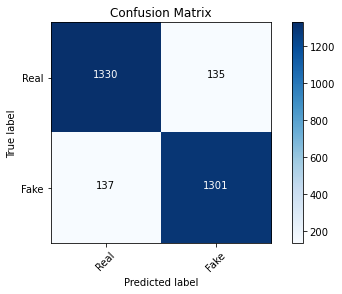

In [30]:
cm_plot_labels = ["Real","Fake"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

Confusion matrix, without normalization
[[ 0 10]
 [ 0 10]]
1/1 [==============================] - 0s 275ms/step - loss: 0.1217 - accuracy: 0.0000e+00


[0.12170436978340149, 0.0]

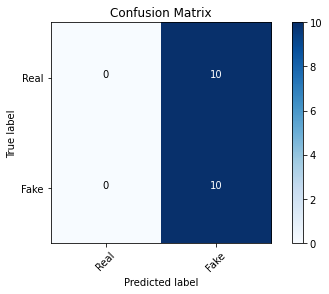

In [51]:
val_predictions = model.predict(x=X_val, batch_size=512, verbose=0)
val_rounded_predictions = np.argmax(val_predictions, axis=-1)
# for i in val_rounded_predictions:
#     print(i)
cm = confusion_matrix(y_true=y_val, y_pred=val_rounded_predictions)
cm_plot_labels = ["Real","Fake"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

model.evaluate(X_val) #ignorare

### Save model
https://youtu.be/qFJeN9V1ZsI?t=3172 

#### 1.model.save

This save function saves:
- The architecture of the model
- The weights
- The training config(loss, optimizer)
- The state of the optimizer, allowing to resume training where we left off


In [33]:
#Check first if file exists already
#If not, save model
import os.path
if os.path.isfile("models/fake_news.h5") is False:
    model.save("models/fake_news.h5")

In [34]:
# from tensorflow.keras.models import load_model

# new_model = load_model("models/fake_news.h5")